In [ ]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# read the csv file melbourne_housingprice_data 

melb_data = pd.read_csv("/content/melb_data.csv")

# printing the first and last 5 rows and all columns 

melb_data.head()



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
# printing the last 5 rows and all columns

melb_data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [ ]:
# observing the number of rows and columns 

melb_data.shape

(13580, 21)

In [ ]:
# print the all column names 

melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# print the non-null values

melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
# Generate descriptive statistics.

melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
# check for the null values 

melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
# Removing the columns which having more number of null values 

melb_data.drop(['CouncilArea', 'YearBuilt', 'BuildingArea', 'Car'], axis=1, inplace=True)



In [ ]:
melb_data.shape

(13580, 17)

In [ ]:
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
melb_data.isnull().sum().sum()

0

In [ ]:
# checking for the duplicate values

melb_data.duplicated().sum()

0

In [ ]:
melb_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
melb_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Landsize         float64
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [ ]:
columns=['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']
columns

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount']

Rooms
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2., 1.]), array([3., 4.])]

caps: [array([1., 1.]), array([4., 4.])]

boxes: [array([2., 2., 3., 3., 2.])]

medians: [array([3., 3.])]

fliers: [array([ 6,  5,  5,  5,  5,  5,  5,  6,  5,  6,  6,  5,  8,  5,  5,  5,  5,
        5,  5,  5,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        7,  5,  5,  6,  5,  5,  5,  5,  5,  7,  5,  5,  5,  6,  5,  6,  5,
        5,  5,  5,  5,  5,  7,  5,  5,  6,  5,  5,  5,  5,  5,  5,  5,  6,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  7,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  8,  5,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        5,  5,  5,  6,  5,  5,  5,  5,  5,  6,  6,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,

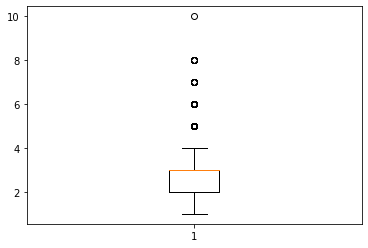

******************************************************************************************
Price
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([650000.,  85000.]), array([1330000., 2350000.])]

caps: [array([85000., 85000.]), array([2350000., 2350000.])]

boxes: [array([ 650000.,  650000., 1330000., 1330000.,  650000.])]

medians: [array([903000., 903000.])]

fliers: [array([2850000., 2615000., 2575000., 3010000., 2800000., 4735000.,
       3755000., 2800000., 2840000., 3625000., 3000000., 2801000.,
       5525000., 2360000., 2365000., 3660000., 3625000., 4200000.,
       3512500., 2810000., 2425000., 2650000., 2950000., 3510000.,
       2752000., 2570000., 2400000., 3250000., 4000000., 2800000.,
       3180000., 3600000., 2550000., 3270000., 2730000., 3000000.,
       3400000., 2900000., 3290000., 2665000., 2410000., 2810000.,
       3401000., 4000000., 3020000., 2950000., 2450000., 3900000.,
       3230000., 3300000., 2614000., 2550000., 3250

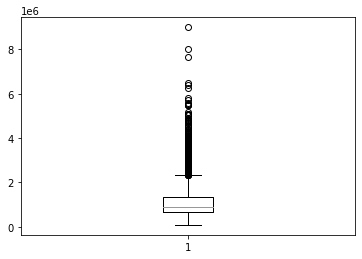

******************************************************************************************
Distance
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([6.1, 0. ]), array([13. , 23.3])]

caps: [array([0., 0.]), array([23.3, 23.3])]

boxes: [array([ 6.1,  6.1, 13. , 13. ,  6.1])]

medians: [array([9.2, 9.2])]

fliers: [array([35.2, 25. , 34.7, 24.7, 24.7, 24.7, 25.9, 38. , 36.9, 38. , 45.9,
       32.3, 45.2, 25.2, 25.2, 31.7, 31.7, 25.9, 25.9, 34.1, 34.1, 23.8,
       23.5, 35.4, 34.7, 31.7, 31.7, 31.7, 27. , 25.5, 25.5, 27.2, 27. ,
       25. , 25. , 25. , 25. , 31.2, 31.2, 31.2, 31.2, 27. , 27. , 24.7,
       24.7, 24.7, 28.8, 24.8, 24.8, 38. , 36.9, 32.3, 25.2, 31.7, 29.8,
       31.7, 26.5, 26.5, 23.5, 35.4, 31.7, 31.7, 35.2, 34.9, 34.9, 24.7,
       24.7, 24.8, 45.9, 32.3, 41. , 31.7, 29.8, 25.9, 25.9, 26.5, 26.5,
       23.5, 23.5, 35.4, 34.7, 31.7, 39.8, 35.2, 31.2, 27. , 24.7, 38. ,
       38. , 38. , 38. , 25.2, 31.7, 29.8, 29.8, 31.6, 34.1,

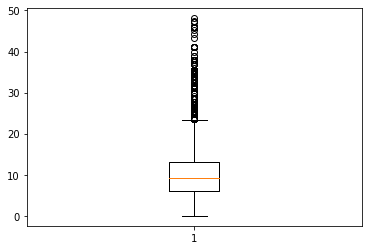

******************************************************************************************
Postcode
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([3044., 3000.]), array([3148., 3207.])]

caps: [array([3000., 3000.]), array([3207., 3207.])]

boxes: [array([3044., 3044., 3148., 3148., 3044.])]

medians: [array([3084., 3084.])]

fliers: [array([3806., 3977., 3754., 3437., 3803., 3777., 3337., 3337., 3754.,
       3754., 3805., 3805., 3335., 3977., 3752., 3752., 3429., 3429.,
       3429., 3750., 3750., 3803., 3337., 3338., 3337., 3752., 3752.,
       3752., 3429., 3429., 3806., 3437., 3803., 3910., 3337., 3338.,
       3754., 3754., 3977., 3429., 3808., 3806., 3337., 3338., 3338.,
       3796., 3805., 3810., 3431., 3977., 3795., 3429., 3806., 3806.,
       3427., 3976., 3337., 3338., 3337., 3795., 3429., 3750., 3340.,
       3806., 3806., 3977., 3803., 3976., 3976., 3337., 3337., 3338.,
       3765., 3752., 3752., 3752., 3752., 3429., 3429., 3429.

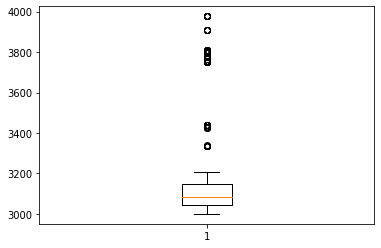

******************************************************************************************
Bedroom2
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2., 1.]), array([3., 4.])]

caps: [array([1., 1.]), array([4., 4.])]

boxes: [array([2., 2., 3., 3., 2.])]

medians: [array([3., 3.])]

fliers: [array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  6.,  5.,  5.,  5.,  5.,  5.,  5.,  8.,  5.,  5.,
        6.,  5.,  9.,  5.,  6.,  5.,  5.,  5.,  5.,  5.,  6.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  7.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  6.,  5.,  6.,  5.,  5.,  5.,  7.,  7.,
        5.,  5.,  6.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  7.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  

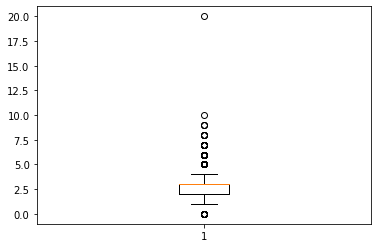

******************************************************************************************
Bathroom
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([1., 0.]), array([2., 3.])]

caps: [array([0., 0.]), array([3., 3.])]

boxes: [array([1., 1., 2., 2., 1.])]

medians: [array([1., 1.])]

fliers: [array([4., 7., 5., 4., 5., 5., 4., 5., 6., 4., 7., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 5., 6., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 5., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 6., 4., 4.,
       5., 4., 5., 4., 4., 4., 4., 4., 4., 5., 8., 4., 4., 5., 4., 4., 5.,
       4., 4., 4., 4., 4., 4., 4., 4., 6., 4., 4., 4., 4., 4., 4., 5., 4.,
       5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 8., 6., 4., 4., 4., 4.,
       5., 4., 4., 5., 4., 4., 4., 5., 5., 5., 4., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 4., 4., 5., 4.])]

means: []



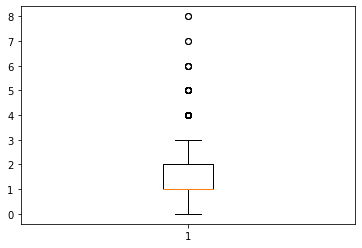

******************************************************************************************
Landsize
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([177.,   0.]), array([ 651., 1357.])]

caps: [array([0., 0.]), array([1357., 1357.])]

boxes: [array([177., 177., 651., 651., 177.])]

medians: [array([440., 440.])]

fliers: [array([  4290.,   1581.,   2113.,   1491.,   2471.,   1957.,   1472.,
         1801.,   2051.,   1468.,   1437.,   1611.,   1364.,  75100.,
         4931.,   1572.,   1561.,   4668.,   4676.,   2120.,   1393.,
         2886.,  15900.,   2773.,   3701.,   1777.,   1484.,   1764.,
         1966.,   2381.,   2925.,   1622.,   1547.,  10100.,   1658.,
         2782.,   4332.,   2778.,   4296.,   4296.,   4296.,   2077.,
         2794.,   8680.,   1783.,   1485.,   3056.,   1996.,   1402.,
         1504.,   3414.,   1585.,   1997.,   3132.,   1568.,   3194.,
         3977.,   4267.,   4440.,   3448.,   3957.,   2136.,   1972.,
      

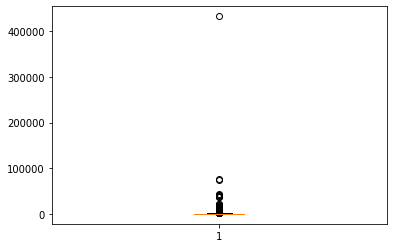

******************************************************************************************
Lattitude
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([-37.8568225, -38.00663  ]), array([-37.7564, -37.606 ])]

caps: [array([-38.00663, -38.00663]), array([-37.606, -37.606])]

boxes: [array([-37.8568225, -37.8568225, -37.7564   , -37.7564   , -37.8568225])]

medians: [array([-37.802355, -37.802355])]

fliers: [array([-38.02434, -38.10687, -38.1523 , -38.11948, -38.16492, -38.03147,
       -38.02938, -38.10422, -38.10542, -38.06257, -38.07921, -38.07938,
       -38.07405, -38.0781 , -38.05304, -38.04683, -38.15517, -38.1187 ,
       -38.11014, -38.05379, -38.09111, -38.10709, -38.16439, -38.09088,
       -38.09083, -38.03062, -38.07483, -38.03526, -38.14444, -38.14264,
       -38.13442, -38.18255, -38.0312 , -38.07474, -38.0817 , -38.1078 ,
       -38.01468, -38.03296, -38.06022, -38.08981, -38.03548, -38.03093,
       -38.13759, -38.13669, -38.15882,

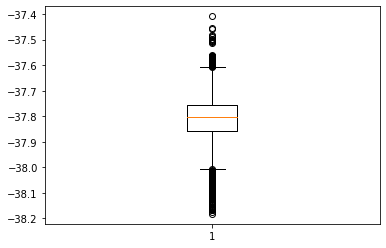

******************************************************************************************
Longtitude
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([144.9296 , 144.73685]), array([145.058305, 145.25077 ])]

caps: [array([144.73685, 144.73685]), array([145.25077, 145.25077])]

boxes: [array([144.9296  , 144.9296  , 145.058305, 145.058305, 144.9296  ])]

medians: [array([145.0001, 145.0001])]

fliers: [array([144.73472, 144.60119, 144.73272, 144.57866, 144.57415, 144.72018,
       144.66615, 144.70069, 144.70553, 144.72865, 144.69649, 144.7034 ,
       144.71155, 144.67244, 144.65264, 144.67241, 144.63041, 144.66671,
       144.68039, 144.6942 , 144.69617, 144.56803, 144.5807 , 144.55833,
       144.71548, 144.71023, 144.65733, 144.64373, 144.65693, 144.66679,
       144.66661, 144.67724, 144.63302, 144.58567, 144.69959, 144.68768,
       144.5864 , 144.57211, 144.72848, 144.65529, 144.65138, 144.72513,
       144.73331, 144.58355, 144.57894, 144

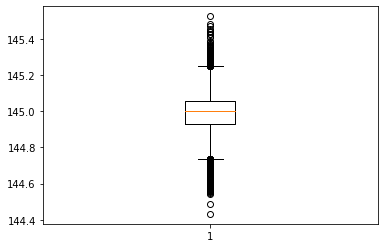

******************************************************************************************
Propertycount
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([4380.,  249.]), array([10331., 17496.])]

caps: [array([249., 249.]), array([17496., 17496.])]

boxes: [array([ 4380.,  4380., 10331., 10331.,  4380.])]

medians: [array([6555., 6555.])]

fliers: [array([21650., 21650., 21650., 21650., 21650., 21650., 21650., 21650.,
       21650., 21650., 21650., 21650., 21650., 21650., 21650., 21650.,
       21650., 21650., 21650., 21650., 21650., 21650., 21650., 21650.,
       21650., 21650., 21650., 21650., 21650., 21650., 21650., 21650.,
       21650., 21650., 21650., 21650., 21650., 21650., 21650., 21650.,
       21650., 21650., 21650., 21650., 21650., 21650., 21650., 21650.,
       21650., 21650., 21650., 21650., 21650., 21650., 21650., 21650.,
       21650., 21650., 21650., 21650., 21650., 21650., 21650., 21650.,
       21650., 21650., 21650., 21650., 21

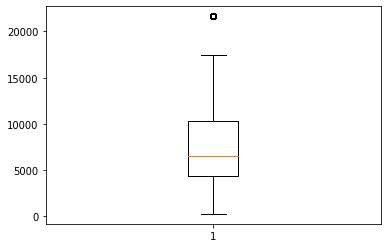

******************************************************************************************


In [ ]:
# check for the outliers 

for col in columns:
    print(col)
    bp=plt.boxplot(melb_data[col], showcaps=True)
    print(bp.keys())
    for key in bp:
        print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')
    plt.show()
    print('***'*30)

In [ ]:
# Treating the outliers 

melb_data['Rooms']=np.where(melb_data['Rooms']>4, 4, melb_data['Rooms'])

melb_data['Price']=np.where(melb_data['Price']>2350000, 2350000, melb_data['Price'])

melb_data['Distance']=np.where(melb_data['Distance']>23.3, 23.3, melb_data['Distance'])

melb_data['Postcode']=np.where(melb_data['Postcode']>3207, 3207, melb_data['Postcode'])

melb_data['Bedroom2']=np.where(melb_data['Bedroom2']<1.0, 1.0, melb_data['Bedroom2'])
melb_data['Bedroom2']=np.where(melb_data['Bedroom2']>4, 4, melb_data['Bedroom2'])

melb_data['Bathroom']=np.where(melb_data['Bathroom']>3, 3, melb_data['Bathroom'])

melb_data['Landsize']=np.where(melb_data['Landsize']<3.0, 3.0, melb_data['Landsize'])
melb_data['Landsize']=np.where(melb_data['Landsize']>1357.0, 1357.0, melb_data['Landsize'])

melb_data['Lattitude']=np.where(melb_data['Lattitude']<-38.00663, -38.00663, melb_data['Lattitude'])
melb_data['Lattitude']=np.where(melb_data['Lattitude']>-37.606, -37.606, melb_data['Lattitude'])

melb_data['Longtitude']=np.where(melb_data['Longtitude']<144.73685, 144.73685, melb_data['Longtitude'])
melb_data['Longtitude']=np.where(melb_data['Longtitude']>145.25077, 145.25077, melb_data['Longtitude'])

melb_data['Propertycount']=np.where(melb_data['Propertycount']>17496.0, 17496.0, melb_data['Propertycount'])

Rooms
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2., 1.]), array([3., 4.])]

caps: [array([1., 1.]), array([4., 4.])]

boxes: [array([2., 2., 3., 3., 2.])]

medians: [array([3., 3.])]

fliers: [array([], dtype=int64)]

means: []



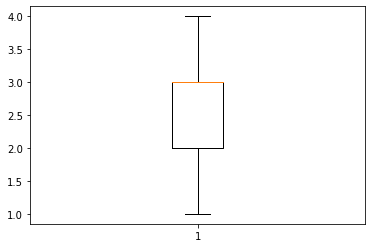

******************************************************************************************
Price
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([650000.,  85000.]), array([1330000., 2350000.])]

caps: [array([85000., 85000.]), array([2350000., 2350000.])]

boxes: [array([ 650000.,  650000., 1330000., 1330000.,  650000.])]

medians: [array([903000., 903000.])]

fliers: [array([], dtype=float64)]

means: []



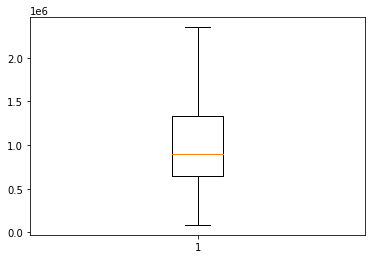

******************************************************************************************
Distance
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([6.1, 0. ]), array([13. , 23.3])]

caps: [array([0., 0.]), array([23.3, 23.3])]

boxes: [array([ 6.1,  6.1, 13. , 13. ,  6.1])]

medians: [array([9.2, 9.2])]

fliers: [array([], dtype=float64)]

means: []



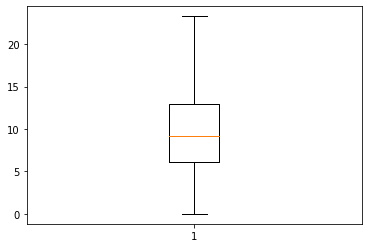

******************************************************************************************
Postcode
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([3044., 3000.]), array([3148., 3207.])]

caps: [array([3000., 3000.]), array([3207., 3207.])]

boxes: [array([3044., 3044., 3148., 3148., 3044.])]

medians: [array([3084., 3084.])]

fliers: [array([], dtype=float64)]

means: []



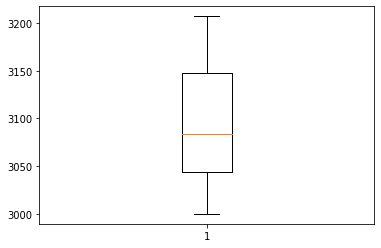

******************************************************************************************
Bedroom2
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([2., 1.]), array([3., 4.])]

caps: [array([1., 1.]), array([4., 4.])]

boxes: [array([2., 2., 3., 3., 2.])]

medians: [array([3., 3.])]

fliers: [array([], dtype=float64)]

means: []



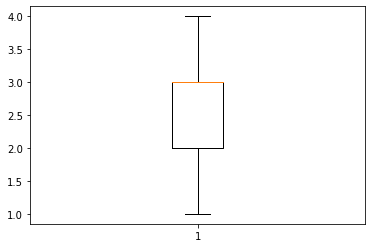

******************************************************************************************
Bathroom
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([1., 0.]), array([2., 3.])]

caps: [array([0., 0.]), array([3., 3.])]

boxes: [array([1., 1., 2., 2., 1.])]

medians: [array([1., 1.])]

fliers: [array([], dtype=float64)]

means: []



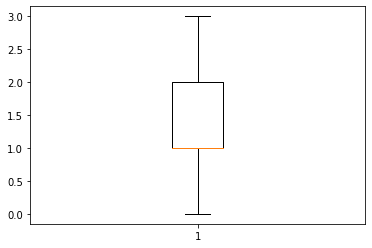

******************************************************************************************
Landsize
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([177.,   3.]), array([ 651., 1357.])]

caps: [array([3., 3.]), array([1357., 1357.])]

boxes: [array([177., 177., 651., 651., 177.])]

medians: [array([440., 440.])]

fliers: [array([], dtype=float64)]

means: []



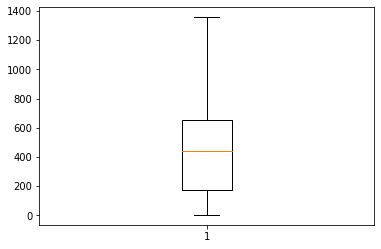

******************************************************************************************
Lattitude
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([-37.8568225, -38.00663  ]), array([-37.7564, -37.606 ])]

caps: [array([-38.00663, -38.00663]), array([-37.606, -37.606])]

boxes: [array([-37.8568225, -37.8568225, -37.7564   , -37.7564   , -37.8568225])]

medians: [array([-37.802355, -37.802355])]

fliers: [array([], dtype=float64)]

means: []



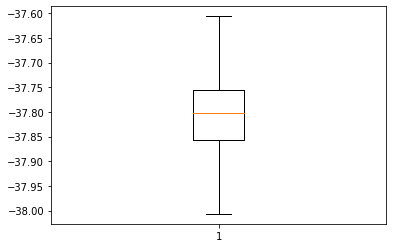

******************************************************************************************
Longtitude
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([144.9296 , 144.73685]), array([145.058305, 145.25077 ])]

caps: [array([144.73685, 144.73685]), array([145.25077, 145.25077])]

boxes: [array([144.9296  , 144.9296  , 145.058305, 145.058305, 144.9296  ])]

medians: [array([145.0001, 145.0001])]

fliers: [array([], dtype=float64)]

means: []



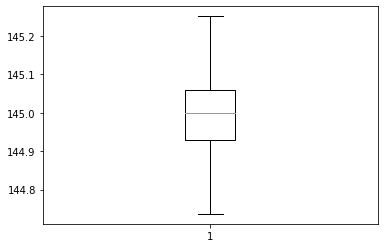

******************************************************************************************
Propertycount
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
whiskers: [array([4380.,  249.]), array([10331., 17496.])]

caps: [array([249., 249.]), array([17496., 17496.])]

boxes: [array([ 4380.,  4380., 10331., 10331.,  4380.])]

medians: [array([6555., 6555.])]

fliers: [array([], dtype=float64)]

means: []



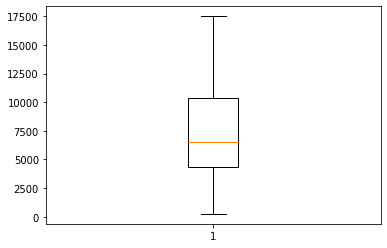

******************************************************************************************


In [ ]:
for col in columns:
    print(col)
    bp=plt.boxplot(melb_data[col].dropna(), showcaps=True)
    print(bp.keys())
    for key in bp:
        print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n')
    plt.show()
    print('***'*30)


In [ ]:
# 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
      # 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
      # 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'

In [ ]:
melb_data.drop(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname'], axis=1, inplace=True)

In [ ]:
melb_data.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,202.0,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,156.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,134.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,94.0,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,120.0,-37.8072,144.9941,4019.0


In [ ]:
melb_data.shape

(13580, 10)

In [ ]:
# split the data to train and test

X = melb_data.drop('Price', axis=1)
X


,Rooms,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,202.0,-37.79960,144.99840,4019.0
1,2,2.5,3067.0,2.0,1.0,156.0,-37.80790,144.99340,4019.0
2,3,2.5,3067.0,3.0,2.0,134.0,-37.80930,144.99440,4019.0
3,3,2.5,3067.0,3.0,2.0,94.0,-37.79690,144.99690,4019.0
4,4,2.5,3067.0,3.0,1.0,120.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...
13575,4,16.7,3150.0,4.0,2.0,652.0,-37.90562,145.16761,7392.0
13576,3,6.8,3016.0,3.0,2.0,333.0,-37.85927,144.87904,6380.0
13577,3,6.8,3016.0,3.0,2.0,436.0,-37.85274,144.88738,6380.0
13578,4,6.8,3016.0,4.0,1.0,866.0,-37.85908,144.89299,6380.0


In [ ]:
Y = melb_data['Price']
Y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2350000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

In [ ]:
X.shape

(13580, 9)

In [ ]:
Y.shape

(13580,)

In [ ]:
X.isna().sum()

Rooms            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [ ]:
Y.isna().sum()

0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10864, 9)
(10864,)
(2716, 9)
(2716,)


In [ ]:
# Model building 

rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, random_state=0)

rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
Y_pred = rfr.predict(x_test)

Y_pred

array([1603800.  ,  877959.  ,  604870.  , ..., 1385090.  , 1283148.88,
       1059335.  ])

In [ ]:
# model evaluation metrics 

mse = mean_squared_error(y_test, Y_pred)

mse

49785539625.86276

In [ ]:
mae = mean_absolute_error(y_test, Y_pred)

mae

149394.6392532202

In [ ]:

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

ss.fit(x_train)


StandardScaler()

In [ ]:
x_train_std=pd.DataFrame(ss.transform(x_train), columns=x_train.columns)

In [ ]:
x_test_std=pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [ ]:
# Model building 

rfr = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=0)

rfr.fit(x_train_std, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
Y_pred = rfr.predict(x_test_std)

Y_pred

array([1605000.  ,  874969.  ,  606830.  , ..., 1378580.  , 1285778.88,
       1059765.  ])

In [ ]:
mse = mean_squared_error(y_test, Y_pred)

mse

49773873025.06153

In [ ]:
melb_preds = rfr.predict(x_test_std)
print(mean_absolute_error(y_test, melb_preds))

149394.6392532202
